### Third Step

Consider the case in which the bid is fixed and learn in online fashion the best pricing strategy when the algorithm does not discriminate among the customers’ classes (and therefore the algorithm works with aggregate data). Assume that the number of daily clicks and the daily cost per click are known. Adopt both an upper-confidence bound approach and a Thompson-sampling approach and compare their performance.

### Main for the experiment

In [4]:
from environment import Environment
from tqdm import tqdm
from learners.ucb_learner import UCB1
from learners.ts_learner import TS_Learner
import numpy as np

env = Environment()
n_arms = 13
ucb1_learner = UCB1(n_arms = n_arms)
ts_learner = TS_Learner(n_arms = n_arms)

T = 365
opt_bids = [3.8622484787564275 , 2.1216094606111944,  2.347134281066495]
opt_price = 6.321089806558111
regret_ucb = []
regret_ts = []

# Use this for testing, the price learned is 7, the optimal one
# bids = opt_bids 
bids = [5.0, 5.0, 5.0]
prices = np.linspace(3.0, 15.0, n_arms)

price_ev_per_day_ucb = []
price_ev_per_day_ts = []

for day in range(T):
    #UCB1 learner
    price_idx = ucb1_learner.pull_arm()
    price = prices[price_idx]
    reward = sum(env.round(bids, price)) #treat as aggregate data
    ucb1_learner.update(price_idx, reward)
    regret_ucb.append(sum(env.round(opt_bids, opt_price, noise= False)) - reward)
    price_ev_per_day_ucb.append(price)

    #TS learner
    price_idx = ts_learner.pull_arm()
    price = prices[price_idx]
    reward = sum(env.round(bids, price)) #treat as aggregate data
    ts_learner.update(price_idx, reward)
    regret_ts.append(sum(env.round(opt_bids, opt_price, noise= False)) - reward)
    price_ev_per_day_ts.append(price)


### Plots

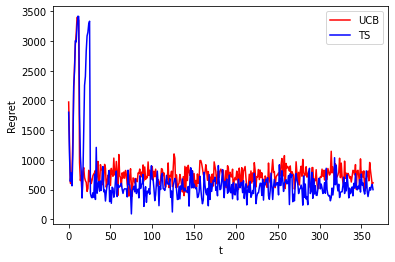

In [5]:
import matplotlib.pyplot as plt 

plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(regret_ucb , 'r')
plt.plot(regret_ts, "b")
plt.legend(["UCB", "TS"])
plt.show()

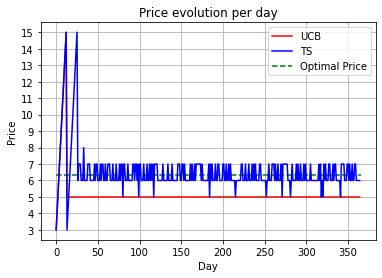

In [6]:
import matplotlib.pyplot as plt 

plt.figure(1)
plt.xlabel("Day")
plt.ylabel("Price")
plt.plot(price_ev_per_day_ucb , 'r')
plt.plot(price_ev_per_day_ts , 'b')
plt.grid()
plt.yticks(prices)
plt.hlines(opt_price, 0, 365, 'g', linestyles='dashed', label="optimal price")
plt.legend(["UCB", "TS", "Optimal Price"])
plt.title("Price evolution per day")
plt.show()